# IMPORTS 

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

# PREPROCESSING
Importing dataset

In [96]:
pgsdf = pd.read_csv('penguins.csv')

Printing head

In [97]:
print(pgsdf.head(10))

   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3               NaN              NaN                NaN          NaN     NaN
4              36.7             19.3              193.0       3450.0  FEMALE
5              39.3             20.6              190.0       3650.0    MALE
6              38.9             17.8              181.0       3625.0  FEMALE
7              39.2             19.6              195.0       4675.0    MALE
8              34.1             18.1              193.0       3475.0     NaN
9              42.0             20.2             5000.0       4250.0    MALE


Getting more info

In [98]:
pgsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


Getting statistics info

In [99]:
pgsdf.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


Checking nulls in dataset

In [100]:
pgsdf.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

Checking if removing nulls is going to affect dataset too harshly

In [101]:
pgsdf.shape

(344, 5)

Dropping all NA's

In [102]:
pgsdf = pgsdf.dropna()

Checking categorical data

In [103]:
pgsdf.sex.unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

Checking if '.' is too expressive

In [104]:
pgsdf.groupby('sex')['sex'].count()

sex
.           1
FEMALE    165
MALE      169
Name: sex, dtype: int64

Deleting '.'

In [105]:
pgsdf = pgsdf[pgsdf['sex'] != '.']

Handling categorical data

In [106]:
pgsdf['sex'] = pd.get_dummies(pgsdf['sex'], drop_first=True).astype(int)

Renaming sex column 

In [107]:
pgsdf = pgsdf.rename(columns={'sex': 'male'})

In [108]:
pgsdf.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
male                 0
dtype: int64

Scaling

In [109]:
numeric_cols = pgsdf.drop('male', axis=1)

In [115]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_cols)
scaled_df = pd.DataFrame(scaled_data, columns=numeric_cols.columns, index=pgsdf.index)

In [116]:
pgsdf_final = pd.concat([scaled_df, pgsdf['male']], axis=1)

# ELBOW METHOD

In [130]:
def elbow(data, maxk):
    inertias = [KMeans(n_clusters=k, random_state=100).fit(data.values).inertia_ for k in range(1, maxk+1)]

    plt.figure(figsize=(10,4))
    plt.step(range(1, maxk + 1), inertias, where='mid', marker='o', color='green', linestyle='-')
    plt.title('Elbow Method for Optimal k')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.xticks(range(1, maxk + 1))
    plt.grid(True)

c:\Users\conta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\conta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\conta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\conta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

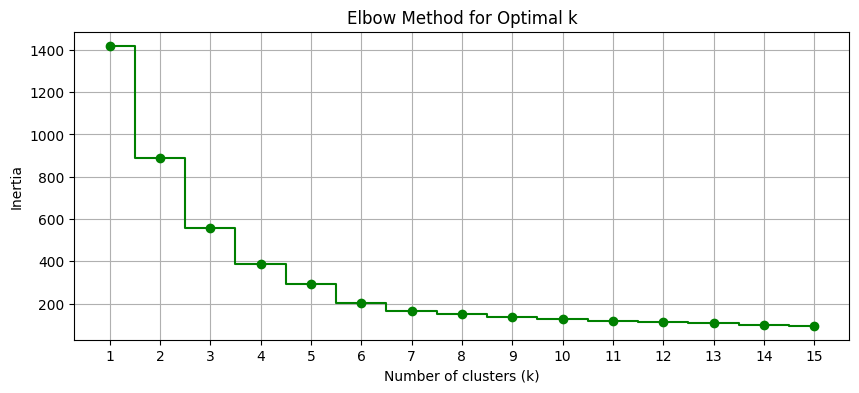

In [132]:
elbow(pgsdf_final, 15)

# AI

In [153]:
km = KMeans(n_clusters=4, random_state=100)

In [154]:
km.fit(pgsdf_final)

c:\Users\conta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=100)

In [155]:
pgsdf_final['cluster'] = km.labels_

In [156]:
print(pgsdf_final.head(10))

    culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  male  \
0          -0.896113         0.774517          -0.126674    -0.569485     1   
1          -0.822764         0.114726          -0.107681    -0.507204     0   
2          -0.676065         0.419245          -0.073493    -1.192302     0   
4          -1.336209         1.079036          -0.081090    -0.943175     0   
5          -0.859439         1.738827          -0.092486    -0.694049     1   
6          -0.932788         0.317739          -0.126674    -0.725190     0   
7          -0.877776         1.231296          -0.073493     0.582725     1   
9          -0.364331         1.535814          18.178878     0.053331     1   
12         -0.529367         0.216233          -0.122875    -1.254583     0   
13         -0.987800         2.043346          -0.088688    -0.507204     1   

    cluster  
0         3  
1         2  
2         2  
4         2  
5         3  
6         2  
7         3  
9         3  
12  

Visualizing clusters

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

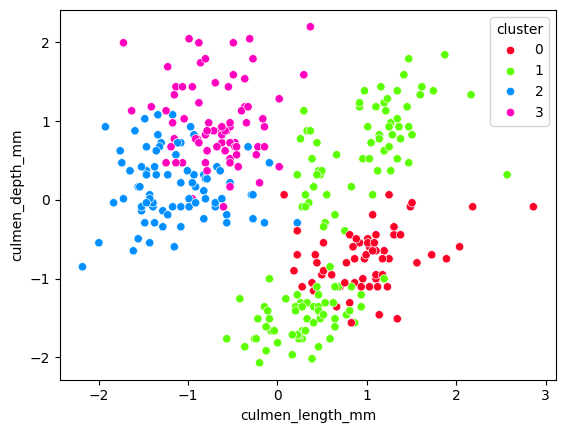

In [157]:
sns.scatterplot(x=pgsdf_final['culmen_length_mm'], 
                y=pgsdf_final['culmen_depth_mm'], 
                hue=pgsdf_final['cluster'], 
                palette='gist_rainbow')

Evaluating

In [161]:
print("Silhouette Score:", silhouette_score(pgsdf_final, km.labels_))
print("Davies–Bouldin Index:", davies_bouldin_score(pgsdf_final, km.labels_))

Silhouette Score: 0.4068339424281835
Davies–Bouldin Index: 0.9685645278681523
